In [1]:
import pandas as pd
doc=pd.read_csv("used4.5.csv")
doc

,Unnamed: 0,name,review,index,Category
0,0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",0,Baby_Care
1,1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,1,Diapering
2,2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,2,Nursery
3,3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,3,Baby_Care
4,4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,4,Baby_Care
...,...,...,...,...,...
408,654,U·nikaka Unisex Baby 0-48 Months 5-Pack Pants ...,The sweaters are very nice and fit quite well....,654,Apparel_accessories
409,658,U·nikaka Unisex Baby 0-48 Months 5-Pack Pants ...,My 13 month old is short and round lol. So I’m...,658,Apparel_accessories
410,660,HAICHEN TEC Ferret Clothes Turtleneck Sweater ...,This is sp cute and hilarious 100 recomend goo...,660,Apparel_accessories
411,661,HAICHEN TEC Ferret Clothes Turtleneck Sweater ...,Mr. B is only 4 weeks old and looks so handsom...,661,Apparel_accessories


In [2]:
data_text=doc[["review","Category"]]
data_text['index']=data_text.index

documents=data_text

<ipython-input-2-318acfee2307>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['index']=data_text.index


In [3]:
documents

,review,Category,index
0,"These flannel wipes are OK, but in my opinion ...",Baby_Care,0
1,it came early and was not disappointed. i love...,Diapering,1
2,Very soft and comfortable and warmer than it l...,Nursery,2
3,This is a product well worth the purchase. I ...,Baby_Care,3
4,All of my kids have cried non-stop when I trie...,Baby_Care,4
...,...,...,...
408,The sweaters are very nice and fit quite well....,Apparel_accessories,408
409,My 13 month old is short and round lol. So I’m...,Apparel_accessories,409
410,This is sp cute and hilarious 100 recomend goo...,Apparel_accessories,410
411,Mr. B is only 4 weeks old and looks so handsom...,Apparel_accessories,411


In [4]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import nltk.stem as stemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/deth/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
stemmer=PorterStemmer()
def lemmatize_stemming(text):
      return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) >3:
              result.append(lemmatize_stemming(token))
  
    return result

In [6]:
doc_sample=documents[documents['index']==4].values[0][0]
print('original document')
words=[]
for word in doc_sample.split(' '):
      words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document
['All', 'of', 'my', 'kids', 'have', 'cried', 'non-stop', 'when', 'I', 'tried', 'to', 'ween', 'them', 'off', 'their', 'pacifier,', 'until', 'I', 'found', 'Thumbuddy', 'To', "Love's", 'Binky', 'Fairy', 'Puppet.', '', 'It', 'is', 'an', 'easy', 'way', 'to', 'work', 'with', 'your', 'kids', 'to', 'allow', 'them', 'to', 'understand', 'where', 'their', 'pacifier', 'is', 'going', 'and', 'help', 'them', 'part', 'from', 'it.This', 'is', 'a', 'must', 'buy', 'book,', 'and', 'a', 'great', 'gift', 'for', 'expecting', 'parents!!', '', 'You', 'will', 'save', 'them', 'soo', 'many', 'headaches.Thanks', 'for', 'this', 'book!', '', 'You', 'all', 'rock!!']


 tokenized and lemmatized document: 
['kid', 'cri', 'stop', 'tri', 'ween', 'pacifi', 'thumbuddi', 'love', 'binki', 'fairi', 'puppet', 'easi', 'work', 'kid', 'allow', 'understand', 'pacifi', 'go', 'help', 'book', 'great', 'gift', 'expect', 'parent', 'save', 'headach', 'thank', 'book', 'rock']


In [7]:
documents.dropna(subset = ["review"], inplace=True) # drop those rows which have NaN value cells


<ipython-input-7-00cd468fc166>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  documents.dropna(subset = ["review"], inplace=True) # drop those rows which have NaN value cells


In [8]:
processed_docs = documents['review'].map(preprocess)
processed_docs

0      [flannel, wipe, opinion, worth, keep, order, s...
1      [come, earli, disappoint, love, planet, wise, ...
2      [soft, comfort, warmer, look, size, perfectli,...
3      [product, worth, purchas, like, posit, ingeni,...
4      [kid, cri, stop, tri, ween, pacifi, thumbuddi,...
                             ...                        
408    [sweater, nice, ferret, mind, fabric, great, p...
409    [month, short, round, find, difficult, pant, p...
410    [cute, hilari, recomend, good, ador, halloween...
411    [week, look, handsom, littl, sweater, hard, sw...
412    [want, dress, guinea, sweater, small, especi, ...
Name: review, Length: 413, dtype: object

In [9]:
dictionary=gensim.corpora.Dictionary(processed_docs)
count=0

for k,v in dictionary.iteritems():
    print(k,v)
    count+=1
    if count>10:
        break

0 blue
1 boyfor
2 cloth
3 countwhich
4 face
5 flannel
6 hand
7 handl
8 higher
9 issu
10 keep


In [10]:
dictionary.filter_extremes(no_below=15,no_above=0.5)


In [11]:
bow_corpus=[dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4]


[(13, 1),
 (24, 2),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 2),
 (32, 1),
 (33, 1),
 (34, 1)]

In [12]:
bow_doc_4=bow_corpus[4]
for i in range(len(bow_doc_4)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4[i][0], 
                                               dictionary[bow_doc_4[i][0]], 
bow_doc_4[i][1]))

Word 13 ("love") appears 1 time.
Word 24 ("book") appears 2 time.
Word 25 ("easi") appears 1 time.
Word 26 ("expect") appears 1 time.
Word 27 ("gift") appears 1 time.
Word 28 ("go") appears 1 time.
Word 29 ("great") appears 1 time.
Word 30 ("help") appears 1 time.
Word 31 ("kid") appears 2 time.
Word 32 ("parent") appears 1 time.
Word 33 ("tri") appears 1 time.
Word 34 ("work") appears 1 time.


In [13]:
from gensim import corpora, models
tfidf=models.TfidfModel(bow_corpus)
corpus_tfidf=tfidf[bow_corpus]

from pprint import pprint

for doc in corpus_tfidf:
  pprint(doc)
  break

[(0, 0.37378287425890977),
 (1, 0.2910888830907095),
 (2, 0.32540999039054613),
 (3, 0.1454802833186967),
 (4, 0.2846385440521788),
 (5, 0.36733253522037906),
 (6, 0.36121313179202574),
 (7, 0.31688477799387366),
 (8, 0.28153961109325704),
 (9, 0.3498424166134522)]


In [14]:
lda_model_tfidf=gensim.models.LdaMulticore(corpus_tfidf,num_topics=8,id2word=dictionary,passes=2,workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
      print('Topic: {} Word: {}'.format(idx,topic))

Topic: 0 Word: 0.025*"love" + 0.024*"book" + 0.023*"month" + 0.022*"babi" + 0.022*"high" + 0.022*"learn" + 0.022*"great" + 0.021*"buy" + 0.019*"item" + 0.017*"time"
Topic: 1 Word: 0.042*"sling" + 0.032*"gift" + 0.027*"babi" + 0.027*"monitor" + 0.025*"camera" + 0.021*"great" + 0.019*"play" + 0.016*"like" + 0.016*"give" + 0.016*"month"
Topic: 2 Word: 0.039*"book" + 0.029*"year" + 0.025*"like" + 0.021*"look" + 0.021*"babi" + 0.021*"diaper" + 0.020*"page" + 0.020*"happi" + 0.019*"love" + 0.017*"track"
Topic: 3 Word: 0.039*"play" + 0.025*"great" + 0.022*"easi" + 0.021*"favorit" + 0.020*"look" + 0.019*"item" + 0.019*"go" + 0.018*"like" + 0.018*"babi" + 0.018*"month"
Topic: 4 Word: 0.031*"love" + 0.023*"easi" + 0.022*"babi" + 0.022*"need" + 0.020*"disappoint" + 0.019*"room" + 0.019*"nice" + 0.019*"good" + 0.019*"year" + 0.018*"littl"
Topic: 5 Word: 0.034*"book" + 0.030*"price" + 0.028*"good" + 0.028*"qualiti" + 0.027*"famili" + 0.027*"cute" + 0.026*"teeth" + 0.023*"interact" + 0.021*"vibrat" 

In [15]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4]],key=lambda tup:-1*tup[1]):
  print("\nScore:{}\t \nTopic:{}".format(score,lda_model_tfidf.print_topic(index,10)))


Score:0.9415656328201294	 
Topic:0.027*"perfect" + 0.027*"diaper" + 0.025*"book" + 0.023*"think" + 0.022*"daughter" + 0.021*"babi" + 0.021*"year" + 0.020*"start" + 0.019*"receiv" + 0.019*"love"


In [16]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_tfidf, bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.062592  0.054635       1        1  22.626900
6      0.034101 -0.015346       2        1  22.015241
2      0.044793  0.015587       3        1  12.900288
4     -0.032209  0.006622       4        1  10.150351
3     -0.030716  0.033206       5        1   9.301416
0      0.034196  0.012890       6        1   8.796870
7     -0.049953 -0.095689       7        1   7.119737
5      0.062379 -0.011905       8        1   7.089196, topic_info=        Term       Freq       Total Category  logprob  loglift
24      book  91.000000   91.000000  Default  30.0000  30.0000
131  teether  37.000000   37.000000  Default  29.0000  29.0000
135    sling  63.000000   63.000000  Default  28.0000  28.0000
122     free  26.000000   26.000000  Default  27.0000  27.0000
67     stick  36.000000   36.000000  Default  26.0000  26.0000
..       ...        ...         ...      ...      ...      ...
44      babi   7.628276  122.130576   Topic8  -3.9494  -0.1266
3      month   6.143336   89.044622   Topic8  -4.1659  -0.0272
56     think   5.171887   68.200458   Topic8  -4.3380   0.0674
29     great   5.469751   89.928204   Topic8  -4.2820  -0.1532
84       buy   5.077610   72.072575   Topic8  -4.3564  -0.0062

[350 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
41        1  0.346263   abl
41        2  0.239720   abl
41        3  0.053271   abl
41        4  0.106542   abl
41        5  0.026636   abl
...     ...       ...   ...
89        4  0.147408  year
89        5  0.040202  year
89        6  0.040202  year
89        7  0.013401  year
89        8  0.080404  year

[1005 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 7, 3, 5, 4, 1, 8, 6])

In [17]:
unseen_document = 'This wallpaper has always been one of my favorite  '
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: -1*tup[1]):
    
        print("\nScore:{}\t \nTopic:{}\n".format(score,lda_model_tfidf.print_topic(index,5)))
  


Score:0.5622897744178772	 
Topic:0.039*"play" + 0.025*"great" + 0.022*"easi" + 0.021*"favorit" + 0.020*"look"


Score:0.06258424371480942	 
Topic:0.025*"love" + 0.024*"book" + 0.023*"month" + 0.022*"babi" + 0.022*"high"


Score:0.06253807246685028	 
Topic:0.039*"book" + 0.029*"year" + 0.025*"like" + 0.021*"look" + 0.021*"babi"


Score:0.06253457069396973	 
Topic:0.034*"book" + 0.030*"price" + 0.028*"good" + 0.028*"qualiti" + 0.027*"famili"


Score:0.06253445893526077	 
Topic:0.027*"perfect" + 0.027*"diaper" + 0.025*"book" + 0.023*"think" + 0.022*"daughter"


Score:0.06251044571399689	 
Topic:0.042*"sling" + 0.032*"gift" + 0.027*"babi" + 0.027*"monitor" + 0.025*"camera"


Score:0.06250794231891632	 
Topic:0.049*"teether" + 0.033*"stick" + 0.031*"free" + 0.026*"vibrat" + 0.025*"buy"


Score:0.0625004842877388	 
Topic:0.031*"love" + 0.023*"easi" + 0.022*"babi" + 0.022*"need" + 0.020*"disappoint"



/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
def format_topic_sentences(lda_model=lda_model_tfidf, corpus=bow_corpus, texts=processed_docs):
    sent_topics_df=pd.DataFrame()
    
    for i, row_list in enumerate(lda_model[corpus]):
        row=row_list[0] if lda_model.per_word_topics else row_list
        row=sorted(row,key=lambda x:(x[1]),reverse=True)
        
        for j, (topic_num,prop_topic) in enumerate(row):
            if j==0:
                wp=lda_model.show_topic(topic_num)
                topic_keywords=', '.join([word for word, prop in wp])
                sent_topics_df=sent_topics_df.append(pd.Series([int(topic_num),round(prop_topic,4),topic_keywords]),ignore_index=True)
            else:
                break
    sent_topics_df.columns=['Dominant_topic','Perc_contribution','Topic_keywords']
    contents=pd.Series(texts)
    sent_topics_df=pd.concat([sent_topics_df,contents],axis=1)
    return sent_topics_df

df_topic_sents_keywords = format_topic_sentences(lda_model=lda_model_tfidf, corpus=bow_corpus, texts=processed_docs)

# Format.  
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic['index']=df_dominant_topic.index
df_dominant_topic

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,index
0,0,4.0,0.9203,"love, easi, babi, need, disappoint, room, nice...","[flannel, wipe, opinion, worth, keep, order, s...",0
1,1,4.0,0.8540,"love, easi, babi, need, disappoint, room, nice...","[come, earli, disappoint, love, planet, wise, ...",1
2,2,6.0,0.8540,"perfect, diaper, book, think, daughter, babi, ...","[soft, comfort, warmer, look, size, perfectli,...",2
3,3,6.0,0.9270,"perfect, diaper, book, think, daughter, babi, ...","[product, worth, purchas, like, posit, ingeni,...",3
4,4,6.0,0.9416,"perfect, diaper, book, think, daughter, babi, ...","[kid, cri, stop, tri, ween, pacifi, thumbuddi,...",4
...,...,...,...,...,...,...
408,408,1.0,0.9026,"sling, gift, babi, monitor, camera, great, pla...","[sweater, nice, ferret, mind, fabric, great, p...",408
409,409,6.0,0.9203,"perfect, diaper, book, think, daughter, babi, ...","[month, short, round, find, difficult, pant, p...",409
410,410,5.0,0.8247,"book, price, good, qualiti, famili, cute, teet...","[cute, hilari, recomend, good, ador, halloween...",410
411,411,6.0,0.9027,"perfect, diaper, book, think, daughter, babi, ...","[week, look, handsom, littl, sweater, hard, sw...",411


In [19]:
new_df_1 = pd.merge(df_dominant_topic, documents[['Category','index','review']], on='index')

new_df_1

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,index,Category,review
0,0,4.0,0.9203,"love, easi, babi, need, disappoint, room, nice...","[flannel, wipe, opinion, worth, keep, order, s...",0,Baby_Care,"These flannel wipes are OK, but in my opinion ..."
1,1,4.0,0.8540,"love, easi, babi, need, disappoint, room, nice...","[come, earli, disappoint, love, planet, wise, ...",1,Diapering,it came early and was not disappointed. i love...
2,2,6.0,0.8540,"perfect, diaper, book, think, daughter, babi, ...","[soft, comfort, warmer, look, size, perfectli,...",2,Nursery,Very soft and comfortable and warmer than it l...
3,3,6.0,0.9270,"perfect, diaper, book, think, daughter, babi, ...","[product, worth, purchas, like, posit, ingeni,...",3,Baby_Care,This is a product well worth the purchase. I ...
4,4,6.0,0.9416,"perfect, diaper, book, think, daughter, babi, ...","[kid, cri, stop, tri, ween, pacifi, thumbuddi,...",4,Baby_Care,All of my kids have cried non-stop when I trie...
...,...,...,...,...,...,...,...,...
408,408,1.0,0.9026,"sling, gift, babi, monitor, camera, great, pla...","[sweater, nice, ferret, mind, fabric, great, p...",408,Apparel_accessories,The sweaters are very nice and fit quite well....
409,409,6.0,0.9203,"perfect, diaper, book, think, daughter, babi, ...","[month, short, round, find, difficult, pant, p...",409,Apparel_accessories,My 13 month old is short and round lol. So I’m...
410,410,5.0,0.8247,"book, price, good, qualiti, famili, cute, teet...","[cute, hilari, recomend, good, ador, halloween...",410,Apparel_accessories,This is sp cute and hilarious 100 recomend goo...
411,411,6.0,0.9027,"perfect, diaper, book, think, daughter, babi, ...","[week, look, handsom, littl, sweater, hard, sw...",411,Apparel_accessories,Mr. B is only 4 weeks old and looks so handsom...


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
count_vec=CountVectorizer()
bow=count_vec.fit_transform(new_df_1['Keywords'].astype(str))
bow=np.array(bow.todense())
bow1=count_vec.fit_transform(new_df_1['Text'].astype(str))
bow1=np.array(bow1.todense())
bow2=np.concatenate((bow,bow1),axis=1)


/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
x=bow2
y=new_df_1['Category']

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.15,stratify=y)


/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
def evaluate_model(X_train, y_train, model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy")
    diff = scores.mean() - model.score(X_test, y_test)
    SD = diff / scores.std()
    
    print(f"Training Score:{model.score(X_train, y_train)}")
    print(f"Cross V Score: {scores.mean()} +/- {scores.std()}")
    print(f"Testing Score: {model.score(X_test, y_test)}")
    print(f"Cross & Test Diff: {diff}")
    print(f"Standard Deviations Away: {SD}")
    print(confusion_matrix(y_test, preds))

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import GradientBoostingClassifier



# model=svm.SVC(kernel='linear', C=1, random_state=0).fit(X_train,y_train) #0.54
model = LogisticRegression(solver='liblinear', random_state=0)#0.61

# # fit the model with data
# model.fit(X_train,y_train)
from sklearn.neighbors import KNeighborsClassifier

# model = KNeighborsClassifier(n_neighbors=3)#0.42

# # Train the model using the training sets
# model.fit(X_train,y_train)

# from sklearn.ensemble import RandomForestClassifier
# from keras.models import Sequential

# # Import `Dense` from `keras.layers`
# from keras.layers import Dense

# from keras.models import Sequential

# # Import `Dense` from `keras.layers`
# from keras.layers import Dense

# # Initialize the constructor
# model = Sequential()

# # Add an input layer 
# model.add(Dense(12, activation='relu', input_shape=(298, 1721)))

# # Add one hidden layer 
# model.add(Dense(8, activation='relu'))

# # Add an output layer 
# model.add(Dense(1, activation='sigmoid'))

# # #Create a Gaussian Classifier
# model=XGBClassifier(
# learning_rate =0.05,
#  n_estimators=1000,
#  max_depth=10,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.9,
#  colsample_bytree=0.9,
#  objective= 'multi:softmax',
#  nthread=10,
#  scale_pos_weight=1
# )
# model=RandomForestClassifier(n_estimators=100)#0.55
# model = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
# model = Sequential()

# # Add an input layer 
# model.add(Dense(12, activation='relu', input_shape=(1721,)))

# # Add one hidden layer 
# model.add(Dense(8, activation='relu'))

# # Add an output layer 
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])



# #0.53 without parameter tuning
#when tuning with max_depth=10,subsample=0.9,colsample_bytree=0.8 or 0.9 increase to 0.56

# #Train the model using the training sets y_pred=clf.predict(X_test)
# model.fit(X_train,y_train)

from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
# model = GaussianNB()
# model = DecisionTreeClassifier()#0.47
# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])
# x1 = X_train.flatten()
                
# model.fit(x1, y_train,epochs=20, batch_size=1, verbose=1)

# Train Decision Tree Classifer

# with GaussinNB, 0.63

# Train the model using the training sets
model.fit(X_train,y_train)


/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LogisticRegression(random_state=0, solver='liblinear')

In [55]:
y_pred=model.predict(X_test)
x1=accuracy_score(y_test,y_pred)
x1

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.5967741935483871

In [56]:
model.classes_

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Activity_entertainment', 'Apparel_accessories', 'Baby_Care',
       'Baby_stationary', 'Baby_toddler_toys', 'Diapering', 'Gift',
       'Nursery'], dtype=object)

In [57]:
model.intercept_

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([-0.52014885, -0.48950958, -0.30904785, -0.29777306, -0.27463923,
       -0.48745508, -0.40969579, -0.358498  ])

In [58]:
model.coef_

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[-0.35738148, -0.27826143, -0.16112654, ..., -0.01754219,
         0.0287324 , -0.00391545],
       [-0.33493762, -0.24917169, -0.11873994, ..., -0.00552896,
        -0.00177696, -0.00206283],
       [-0.26573421, -0.29144216, -0.00525057, ..., -0.00755567,
        -0.00428059, -0.00822369],
       ...,
       [-0.30706257, -0.20059181, -0.11918124, ..., -0.00386227,
        -0.00285155, -0.00117451],
       [-0.22055093, -0.1706396 , -0.10540571, ..., -0.01305459,
        -0.00281903, -0.00276259],
       [-0.21134241, -0.22370813, -0.07032606, ..., -0.00653646,
        -0.00389185,  0.01194743]])

In [59]:
model.predict_proba(x)

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.1001958 , 0.09501206, 0.31833247, ..., 0.1007455 , 0.08408247,
        0.09948766],
       [0.08245863, 0.08217998, 0.14371867, ..., 0.16064918, 0.09351639,
        0.1493261 ],
       [0.06233721, 0.06781437, 0.11144228, ..., 0.15712583, 0.11619482,
        0.11514441],
       ...,
       [0.09814632, 0.14516651, 0.1029238 , ..., 0.04937297, 0.08884696,
        0.06462431],
       [0.08605095, 0.09414507, 0.14840545, ..., 0.13084858, 0.11338283,
        0.1007337 ],
       [0.08310469, 0.19776718, 0.16600524, ..., 0.05707799, 0.11067412,
        0.13528684]])

In [60]:
model.predict(x)

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Baby_Care', 'Baby_toddler_toys', 'Baby_stationary', 'Baby_Care',
       'Baby_Care', 'Baby_Care', 'Baby_stationary', 'Gift', 'Gift',
       'Gift', 'Gift', 'Gift', 'Gift', 'Gift', 'Baby_stationary',
       'Baby_stationary', 'Gift', 'Baby_stationary', 'Baby_stationary',
       'Baby_stationary', 'Baby_stationary', 'Baby_stationary',
       'Baby_stationary', 'Baby_stationary', 'Baby_stationary',
       'Baby_stationary', 'Gift', 'Activity_entertainment',
       'Baby_stationary', 'Baby_stationary', 'Activity_entertainment',
       'Baby_stationary', 'Activity_entertainment',
       'Activity_entertainment', 'Activity_entertainment',
       'Activity_entertainment', 'Activity_entertainment',
       'Baby_toddler_toys', 'Baby_stationary', 'Baby_stationary',
       'Baby_stationary', 'Baby_stationary', 'Baby_stationary',
       'Baby_stationary', 'Baby_stationary', 'Baby_toddler_toys',
       'Baby_stationary', 'Baby_toddler_toys', 'Baby_Care',
       'Baby_stationary', 'Gift', 'B

In [61]:
model.score(x, y)

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.8159806295399515

In [62]:
confusion_matrix(y, model.predict(x))

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[27,  0,  1,  4,  5,  0,  0,  0],
       [ 0,  9,  2,  3,  4,  0,  0,  0],
       [ 0,  0, 77,  0,  6,  0,  0,  0],
       [ 0,  0,  2, 44,  8,  0,  1,  0],
       [ 0,  0,  5,  3, 73,  0,  1,  0],
       [ 0,  0,  2,  0,  2, 27,  0,  1],
       [ 1,  0,  2,  1,  5,  0, 38,  0],
       [ 0,  0,  2,  6,  7,  0,  2, 42]])

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


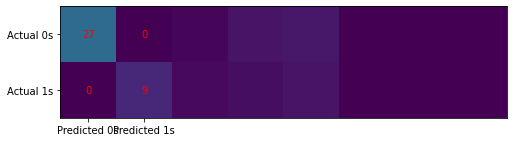

In [63]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [64]:
print(classification_report(y, model.predict(x)))

                        precision    recall  f1-score   support

Activity_entertainment       0.96      0.73      0.83        37
   Apparel_accessories       1.00      0.50      0.67        18
             Baby_Care       0.83      0.93      0.87        83
       Baby_stationary       0.72      0.80      0.76        55
     Baby_toddler_toys       0.66      0.89      0.76        82
             Diapering       1.00      0.84      0.92        32
                  Gift       0.90      0.81      0.85        47
               Nursery       0.98      0.71      0.82        59

              accuracy                           0.82       413
             macro avg       0.88      0.78      0.81       413
          weighted avg       0.84      0.82      0.82       413



/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(X_train,y_train)

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [66]:
# import numpy as np
# y_test=pd.factorize(y_test)[0]

# # y_test = np.reshape(y_test, (-1, 2))


# # y_test=y_test.flatten()
# y_test=np.reshape(y_test,(2, 31))
# y_test

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
model.intercept_

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([-1.44498255, -1.2084762 , -0.8258293 , -0.46336829, -0.54771122,
       -1.26742627, -1.01279723, -0.78827544])

In [68]:
len(y_test)

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


62

In [69]:
model.coef_

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[-0.87399478, -0.79625983, -0.51661123, ..., -0.13709069,
         0.15976389, -0.00919733],
       [-0.68259684, -0.43656966, -0.22314589, ..., -0.0914084 ,
        -0.01114771, -0.00348967],
       [-0.62561871, -0.78469811, -0.23275862, ..., -0.02599052,
        -0.01024491, -0.04750706],
       ...,
       [-0.7091388 , -0.57964276, -0.38283083, ..., -0.00948221,
        -0.00154609, -0.0010158 ],
       [-0.44962513, -0.48832106, -0.29106675, ..., -0.05946649,
        -0.00190333, -0.00195145],
       [-0.45347293, -0.53649856, -0.14854979, ..., -0.00579471,
        -0.00527157,  0.02633608]])

In [70]:
model.predict_proba(x)

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[3.95185147e-03, 2.89604310e-03, 9.70774659e-01, ...,
        6.99068997e-03, 2.00236951e-03, 7.08829379e-04],
       [4.37824950e-03, 2.52323455e-03, 1.25836109e-02, ...,
        9.43740148e-01, 1.79834274e-03, 1.84437641e-02],
       [1.68785864e-03, 1.35407285e-02, 2.68027948e-02, ...,
        4.41506002e-02, 1.43847236e-02, 1.79784778e-02],
       ...,
       [4.22370227e-03, 9.29398010e-01, 4.69271349e-03, ...,
        7.47355447e-04, 3.32990995e-03, 6.77830404e-04],
       [1.33178397e-02, 7.67801447e-01, 9.09858499e-02, ...,
        1.71611107e-02, 1.06803656e-02, 1.06179962e-02],
       [3.17837476e-03, 9.46946347e-01, 5.87366271e-03, ...,
        1.07470115e-03, 4.47022894e-03, 6.59476278e-03]])

In [71]:
model.predict(x)

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Baby_Care', 'Diapering', 'Baby_stationary', 'Baby_Care',
       'Baby_Care', 'Baby_Care', 'Nursery', 'Gift', 'Gift', 'Gift',
       'Gift', 'Gift', 'Gift', 'Gift', 'Baby_stationary',
       'Baby_stationary', 'Baby_stationary', 'Baby_stationary',
       'Baby_stationary', 'Baby_stationary', 'Baby_stationary',
       'Baby_stationary', 'Baby_stationary', 'Baby_stationary',
       'Baby_stationary', 'Baby_stationary', 'Gift',
       'Activity_entertainment', 'Activity_entertainment',
       'Baby_stationary', 'Activity_entertainment',
       'Activity_entertainment', 'Activity_entertainment',
       'Activity_entertainment', 'Activity_entertainment',
       'Activity_entertainment', 'Activity_entertainment',
       'Activity_entertainment', 'Baby_stationary', 'Baby_stationary',
       'Baby_stationary', 'Baby_stationary', 'Baby_stationary',
       'Baby_stationary', 'Baby_stationary', 'Baby_stationary',
       'Baby_stationary', 'Baby_stationary', 'Baby_stationary',
       'Baby_

In [72]:
model.score(x, y)

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.9612590799031477

In [73]:
cm1=confusion_matrix(y, model.predict(x))

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
print(classification_report(y, model.predict(x)))

                        precision    recall  f1-score   support

Activity_entertainment       0.95      0.97      0.96        37
   Apparel_accessories       1.00      0.94      0.97        18
             Baby_Care       0.99      0.99      0.99        83
       Baby_stationary       0.89      0.98      0.93        55
     Baby_toddler_toys       0.96      0.96      0.96        82
             Diapering       1.00      0.97      0.98        32
                  Gift       0.95      0.89      0.92        47
               Nursery       0.98      0.95      0.97        59

              accuracy                           0.96       413
             macro avg       0.97      0.96      0.96       413
          weighted avg       0.96      0.96      0.96       413



/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(X_train, y_train)

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [76]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[ 2  0  0  2  2  0  0  0]
 [ 0  0  0  2  1  0  0  0]
 [ 0  0 10  0  2  0  0  0]
 [ 0  0  0  4  3  0  1  0]
 [ 0  0  2  0 10  0  0  0]
 [ 0  0  0  0  0  4  0  1]
 [ 1  0  0  1  2  0  3  0]
 [ 0  0  1  3  1  0  0  4]]


/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


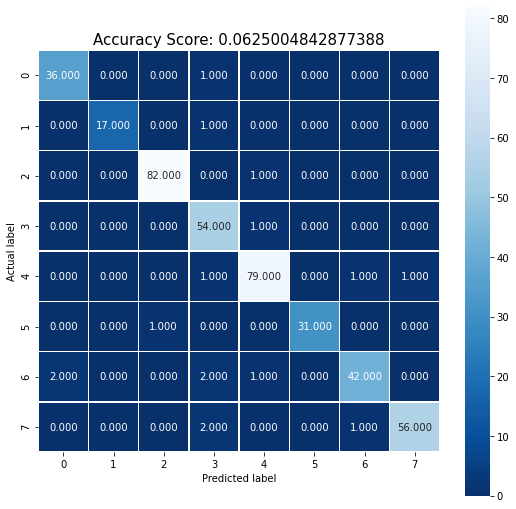

In [77]:
import seaborn as sns
# cm = confusion_matrix(y_test, y_pred)

# fig, ax = plt.subplots(figsize=(8, 8))
# ax.imshow(cm)
# ax.grid(False)
# ax.set_xlabel('Predicted outputs', fontsize=30, color='black')
# ax.set_ylabel('Actual outputs', fontsize=30, color='black')
# ax.xaxis.set(ticks=range(10))
# ax.yaxis.set(ticks=range(10))
# ax.set_ylim(9.5, -0.5)
# for i in range(10):
#     for j in range(10):
#         ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
# plt.show()
plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [78]:
# x_pred=model.predict(y_test)
# x_pred

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
